In [1162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1163]:
patient_df = pd.read_csv("GBM patient data.csv", na_values = ' ')
patient_df.shape

(750, 42)

In [1164]:
# check first 5 rows of dataframe
patient_df.head()

,MD_ID,PATIENT_ID,COUNTRY,Line of therapy,Year of birth,Age at diagnosis,Gender,Race,Adequate caretaker support,Travel time to your office < 30 min,...,MGMT methylated,EGFR mutated,TP53 mutated,IDH1/IDH2 mutated,PD-L1 overexpressed,% of tumor mass surgically resected,Regimen in 1st Line,Regimen in 1st Line (Other),Regimen in 2nd Line,Regimen in 2nd Line (Other)
0,10487,104871,US,1L,1954,58,Male,Black/African,1,1,...,9,9,9,9,9,10,Avastin mono,NaN,999,NaN
1,10487,104872,US,1L,1947,66,Female,White/Caucasian,1,0,...,9,9,9,9,9,999,Avastin + Lomustine,NaN,999,NaN
2,10487,104873,US,2L,1957,56,Male,Black/African,1,1,...,9,9,9,9,9,999,Avastin + Irinotecan,NaN,Avastin mono,NaN
3,10487,104874,US,2L,1955,58,Female,Black/African,1,1,...,9,9,9,9,9,999,Avastin + Irinotecan,NaN,TMZ mono,NaN
4,10487,104875,US,2L,1946,67,Male,White/Caucasian,1,1,...,9,9,9,9,9,999,Avastin mono,NaN,Lomustine mono,NaN


In [1165]:
# check the data types of features
patient_df.dtypes

MD_ID                                       int64
PATIENT_ID                                  int64
COUNTRY                                    object
Line of therapy                            object
Year of birth                               int64
Age at diagnosis                            int64
Gender                                     object
Race                                       object
Adequate caretaker support                  int64
Travel time to your office < 30 min         int64
Patient's level of involvement in GBM      object
Patient's treatment goals                  object
Primary insurance                          object
Comorbidity: Renal impairment               int64
Comorbidity: Anemia                         int64
Comorbidity: COPD/Pulmonary                 int64
Comorbidity: Diabetes                       int64
Comorbidity: CHF (Cong. Heart Failure)      int64
Comorbidity: Neuropathies                   int64
Comorbidity: Other Neurological             int64


Missing Value Check

In [1166]:
# check for NaN
patient_df.isnull().sum()

MD_ID                                        0
PATIENT_ID                                   0
COUNTRY                                      0
Line of therapy                              0
Year of birth                                0
Age at diagnosis                             0
Gender                                       0
Race                                         0
Adequate caretaker support                   0
Travel time to your office < 30 min          0
Patient's level of involvement in GBM        0
Patient's treatment goals                    0
Primary insurance                            0
Comorbidity: Renal impairment                0
Comorbidity: Anemia                          0
Comorbidity: COPD/Pulmonary                  0
Comorbidity: Diabetes                        0
Comorbidity: CHF (Cong. Heart Failure)       0
Comorbidity: Neuropathies                    0
Comorbidity: Other Neurological              0
Comorbidity: Hepatic insufficiency           0
Comorbidity: 

In [1167]:
# function for calculating the number of missing values for each column
# function parameter is the column name
def checkMissingPercentage (df, colname):
    if df[colname].dtype == np.object:
        return ((df[colname].values == "9").sum() +
                (df[colname].values == "999").sum() + 
                 df[colname].isna().sum()) / df.shape[0]
    else: 
        return ((df[colname].values == 9).sum() + 
                (df[colname].values == 999).sum() + 
                 df[colname].isna().sum()) / df.shape[0]

missingRate = []
collabs = patient_df.columns.tolist()
for col in collabs:
    missingRate.append(checkMissingPercentage(patient_df, col))

col_missingRate = pd.Series(missingRate, index=collabs)
print(col_missingRate)

MD_ID                                     0.00
PATIENT_ID                                0.00
COUNTRY                                   0.00
Line of therapy                           0.00
Year of birth                             0.00
Age at diagnosis                          0.00
Gender                                    0.00
Race                                      0.00
Adequate caretaker support                0.07
Travel time to your office < 30 min       0.06
Patient's level of involvement in GBM     0.00
Patient's treatment goals                 0.00
Primary insurance                         0.06
Comorbidity: Renal impairment             0.00
Comorbidity: Anemia                       0.00
Comorbidity: COPD/Pulmonary               0.00
Comorbidity: Diabetes                     0.00
Comorbidity: CHF (Cong. Heart Failure)    0.00
Comorbidity: Neuropathies                 0.00
Comorbidity: Other Neurological           0.00
Comorbidity: Hepatic insufficiency        0.00
Comorbidity: 

Handling missing values:

+ Dropped all columns with the perentages of missing values within 60% - 100% based on the rule-of-thumb for missing value handling.
+ Also dropped columns with 20% - 50% missing values because it's hard to impute on the values based on only 700-800 rows of data.
+ Row-wise deletion for columns with missing value rates of 6% - 7%

In [1168]:
# missing value handling
patient_df_updated = patient_df.drop(["Regimen in 2nd Line (Other)",
                                      "Regimen in 1st Line (Other)",
                                      "Regimen in 2nd Line",
                                      "% of tumor mass surgically resected",
                                      "PD-L1 overexpressed","IDH1/IDH2 mutated",
                                      "TP53 mutated","EGFR mutated",
                                      "MGMT methylated","ECOG At 2nd Line","Comorbidity: Other (specify).1"], axis =1)
patient_df_updated = patient_df_updated[(patient_df_updated["Adequate caretaker support"] != 9)
                                & (patient_df_updated["Travel time to your office < 30 min"] != 9)
                                & (patient_df_updated["Primary insurance"] != "9")]

In [1169]:
missingRate = []
collabs = patient_df_updated.columns.tolist()

for col in collabs:
    missingRate.append(checkMissingPercentage(patient_df_updated, col))
col_missingRate = pd.Series(missingRate, index=collabs)

print(col_missingRate)

MD_ID                                     0.00
PATIENT_ID                                0.00
COUNTRY                                   0.00
Line of therapy                           0.00
Year of birth                             0.00
Age at diagnosis                          0.00
Gender                                    0.00
Race                                      0.00
Adequate caretaker support                0.00
Travel time to your office < 30 min       0.00
Patient's level of involvement in GBM     0.00
Patient's treatment goals                 0.00
Primary insurance                         0.00
Comorbidity: Renal impairment             0.00
Comorbidity: Anemia                       0.00
Comorbidity: COPD/Pulmonary               0.00
Comorbidity: Diabetes                     0.00
Comorbidity: CHF (Cong. Heart Failure)    0.00
Comorbidity: Neuropathies                 0.00
Comorbidity: Other Neurological           0.00
Comorbidity: Hepatic insufficiency        0.00
Comorbidity: 

In [1170]:
# size of data after data cleaning
patient_df_updated.shape

(657, 31)

converting categorical features into numerical ones

Exploratory Analysis

In [1171]:
def plotbarplot (col_name, axs):
    freq = patient_df_updated[col_name].value_counts()
    labels = freq.index.tolist()
    barnum = np.arange(len(labels))
    if col_name == "Age at diagnosis":
        axs.hist(patient_df["Age at diagnosis"])
    else:
        axs.barh(barnum, freq)
        plt.setp(axs, yticks=barnum, yticklabels=labels)
        axs.invert_yaxis()
    axs.set_xlabel(col_name)
    ax.set_yticklabels(labels,  fontsize=20)

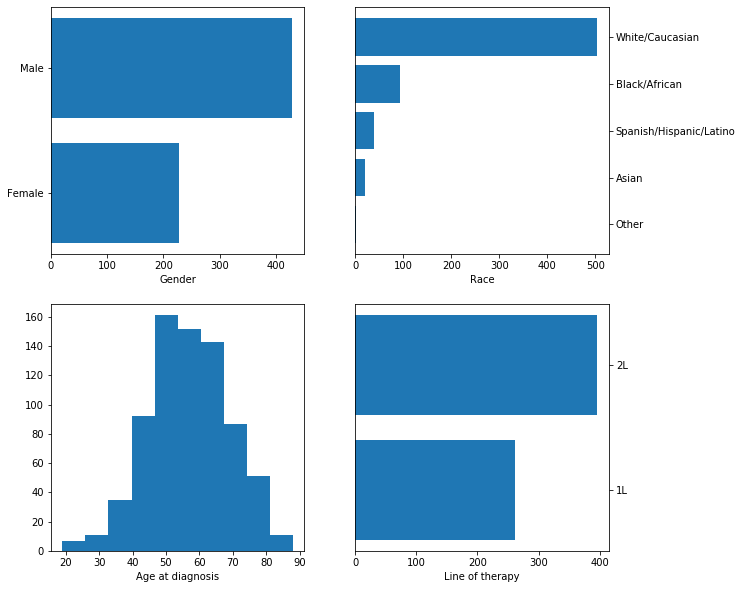

In [1172]:
# barplots for "Gender", "Race", "Age at diagnosis", "Primary insurance"
fig, axs = plt.subplots(2, 2, figsize=(10,10))
cols = ["Gender", "Race", "Age at diagnosis", "Line of therapy"]

plotbarplot(cols[0], axs[0, 0])
plotbarplot(cols[1], axs[0, 1])
axs[0, 1].yaxis.tick_right()
plotbarplot(cols[2], axs[1, 0])
plotbarplot(cols[3], axs[1, 1])
axs[1, 1].yaxis.tick_right()


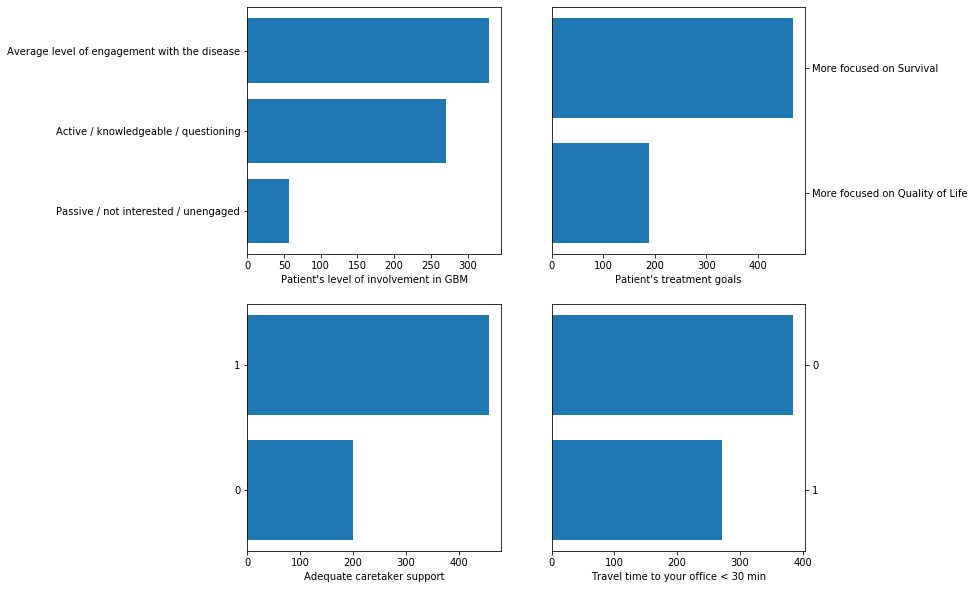

In [1173]:
# BARPLOTS for "Patient's level of involvement in GBM", "Patient's treatment goals", 
#  "Adequate caretaker support", "Travel time to your office < 30 min"
fig, axs = plt.subplots(2, 2, figsize=(10,10))
cols = ["Patient's level of involvement in GBM", "Patient's treatment goals", 
        "Adequate caretaker support", "Travel time to your office < 30 min"]

plotbarplot(cols[0], axs[0, 0])
plotbarplot(cols[1], axs[0, 1])
axs[0, 1].yaxis.tick_right()
plotbarplot(cols[2], axs[1, 0])
plotbarplot(cols[3], axs[1, 1])
axs[1, 1].yaxis.tick_right()

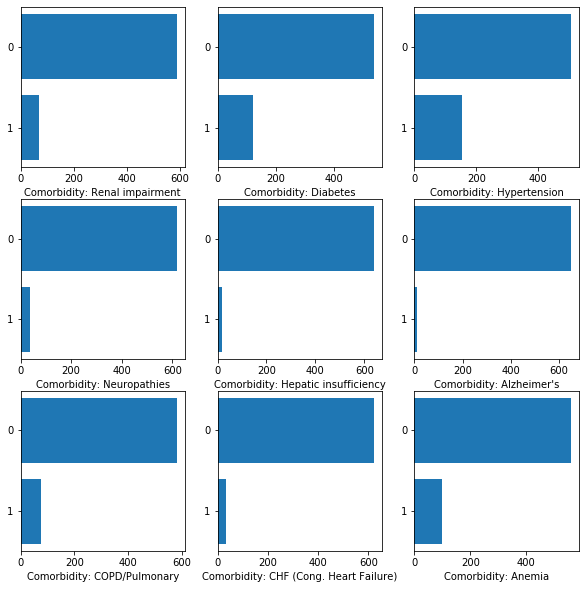

In [1174]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
cols = ["Comorbidity: Renal impairment", "Comorbidity: Diabetes", 
        "Comorbidity: Hypertension", "Comorbidity: Neuropathies",
        "Comorbidity: Hepatic insufficiency", "Comorbidity: Alzheimer's",
        "Comorbidity: COPD/Pulmonary", "Comorbidity: CHF (Cong. Heart Failure)", 
        "Comorbidity: Anemia"]

plotbarplot(cols[0], axs[0, 0])
plotbarplot(cols[1], axs[0, 1])
plotbarplot(cols[2], axs[0, 2])
plotbarplot(cols[3], axs[1, 0])
plotbarplot(cols[4], axs[1, 1])
plotbarplot(cols[5], axs[1, 2])
plotbarplot(cols[6], axs[2, 0])
plotbarplot(cols[7], axs[2, 1])
plotbarplot(cols[8], axs[2, 2])

In [1175]:
# encoding for categorical variables
def cat_var(df): 
    """Identify categorical features. 

    Parameters
    ----------
    df: original df after missing operations 

    Returns
    -------
    cat_var_df: summary df with col index and col name for all categorical vars
    """
    col_type = df.dtypes
    col_names = list(df)

    cat_var_index = [i for i, x in enumerate(col_type) if x=='object']
    cat_var_name = [x for i, x in enumerate(col_names) if i in cat_var_index]

    cat_var_df = pd.DataFrame({'cat_ind': cat_var_index, 
                               'cat_name': cat_var_name})

    return cat_var_df

cat_var_df = cat_var(patient_df_updated)

from sklearn.preprocessing import LabelEncoder 
def column_encoder(df):
    """Encoding categorical feature in the dataframe

    Parameters
    ----------
    df: input dataframe 
    cat_var_list: categorical feature index and name, from cat_var function

    Return
    ------
    df: new dataframe where categorical features are encoded
    label_list: classes_ attribute for all encoded features 
    """

    label_list = []
    cat_var_df = cat_var(df)
    cat_list = cat_var_df.loc[:, 'cat_name']

    for index, cat_feature in enumerate(cat_list): 

        le = LabelEncoder()

        le.fit(df.loc[:, cat_feature])    
        label_list.append(list(le.classes_))

        df.loc[:, cat_feature] = le.transform(df.loc[:, cat_feature])

    return df, label_list

column_encoder(patient_df_updated)

###selecting top 449 features

(     MD_ID  PATIENT_ID  COUNTRY  Line of therapy  Year of birth  \
 0    10487      104871        0                0           1954   
 1    10487      104872        0                0           1947   
 4    10487      104875        0                1           1946   
 5    10488      104881        0                0           1948   
 6    10488      104882        0                0           1945   
 ..     ...         ...      ...              ...            ...   
 745  13536      135361        0                0           1965   
 746  13536      135362        0                0           1971   
 747  13536      135363        0                1           1971   
 748  13536      135364        0                1           1973   
 749  13536      135365        0                1           1964   
 
      Age at diagnosis  Gender  Race  Adequate caretaker support  \
 0                  58       1     1                           1   
 1                  66       0     4          

In [1176]:
# dropping MD_ID, PATIENT_ID
patient_df_withID = patient_df_updated
patient_df_updated = patient_df_updated.drop(columns = ["MD_ID", "PATIENT_ID"])

In [1177]:
patient_df_updated

,COUNTRY,Line of therapy,Year of birth,Age at diagnosis,Gender,Race,Adequate caretaker support,Travel time to your office < 30 min,Patient's level of involvement in GBM,Patient's treatment goals,...,Comorbidity: Other cytopenia,Comorbidity: Autoimmune disorder,Comorbidity: Hypertension,Comorbidity: Other Cardiovascular,Comorbidity: Alzheimer's,Comorbidity: Other cancer (besides GBM),Comorbidity: Other (specify),Comorbidity: None,ECOG At 1st Line,Regimen in 1st Line
0,0,0,1954,58,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,2,3
1,0,0,1947,66,0,4,1,0,1,0,...,0,0,0,0,0,0,0,0,2,1
4,0,1,1946,67,1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,2,3
5,0,0,1948,67,1,4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,2
6,0,0,1945,70,1,4,0,1,1,0,...,0,0,1,0,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,1965,49,0,4,1,0,2,0,...,0,0,0,0,0,0,0,1,1,3
746,0,0,1971,43,0,4,0,0,2,0,...,0,0,0,0,0,0,0,1,1,5
747,0,1,1971,43,1,4,1,1,1,1,...,0,0,0,0,0,0,0,1,1,5
748,0,1,1973,41,0,3,1,0,2,1,...,0,0,0,0,0,0,0,1,1,5


Modeling: K-Means Clustering

In [1178]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=500, verbose=1)

model.fit(patient_df_updated)

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
clusters = model.predict(patient_df_updated)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 19341.031502426405
start iteration
done sorting
end inner loop
Iteration 1, inertia 18870.26492281209
start iteration
done sorting
end inner loop
Iteration 2, inertia 18762.352531940163
start iteration
done sorting
end inner loop
Iteration 3, inertia 18705.545321696856
start iteration
done sorting
end inner loop
Iteration 4, inertia 18694.630381339037
start iteration
done sorting
end inner loop
Iteration 5, inertia 18694.630381339037
center shift 0.000000e+00 within tolerance 1.031069e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 26197.89191913742
start iteration
done sorting
end inner loop
Iteration 1, inertia 20464.307283475828
start iteration
done sorting
end inner loop
Iteration 2, inertia 19605.970921851327
start iteration
done sorting
end inner loop
Iteration 3, inertia 19538.17740216569
start iteration
done sorting
end inner loop
Iteration 4, in

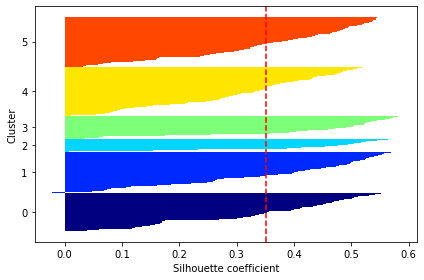

In [1179]:
# Sillhouette analysis
from sklearn import metrics

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

# plot the silhouette plot for the model with K=5 
plot_silhouettes(patient_df_updated, clusters)

In [1180]:
# calculate the mean silhouette score
silhouettes = metrics.silhouette_samples(patient_df_updated, clusters)
print(silhouettes.mean())

0.35032352641792514


In [1181]:
# list the cluster that each patient belongs to
patient_df_updated["clusters"] = clusters
patient_df_updated.head(10).T #trnasposed for viewing purposes

,0,1,4,5,6,7,8,9,10,11
COUNTRY,0,0,0,0,0,0,0,0,0,0
Line of therapy,0,0,1,0,0,1,1,1,0,0
Year of birth,1954,1947,1946,1948,1945,1948,1940,1945,1965,1958
Age at diagnosis,58,66,67,67,70,66,74,69,50,57
Gender,1,0,1,1,1,0,0,0,1,0
Race,1,4,4,4,4,4,4,4,4,4
Adequate caretaker support,1,1,1,1,0,0,1,0,1,1
Travel time to your office < 30 min,1,0,1,1,1,1,1,1,1,1
Patient's level of involvement in GBM,0,1,1,0,1,1,1,1,0,0
Patient's treatment goals,1,0,1,0,0,0,0,0,1,1


Select the best K-value using Elbow method:

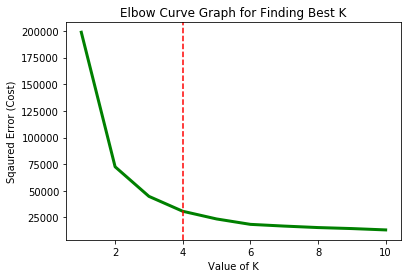

In [1182]:
# elbow method for selecting the best K value
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(patient_df_updated) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.axvline(x=4, color ='r', ls='--')
plt.title("Elbow Curve Graph for Finding Best K")
plt.show() # clear the plot

The turning point on the cost function occurs when K=4 so the best K-value is 4.

In [1183]:
# now running K-Means with K=4
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, max_iter=1500)

model.fit(patient_df_updated)

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

# produce clusters with K=4
clusters_optimal = model.predict(patient_df_updated)

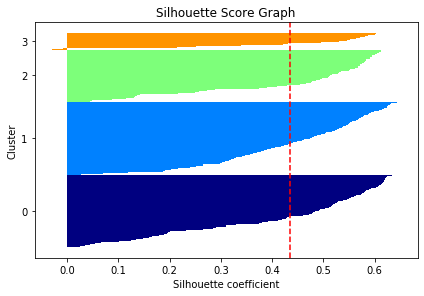

In [1184]:
# Sillhouette analysis
from sklearn import metrics

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.title("Silhouette Score Graph")
    plt.show()
    
    return

# plot the silhouette plot for the model with optimal K-value
plot_silhouettes(patient_df_updated, clusters_optimal)

In [1185]:
silhouettes = metrics.silhouette_samples(patient_df_updated, clusters_optimal)
print(silhouettes[:20])

[0.55049368 0.11486264 0.27198467 0.1299081  0.46225925 0.04642847
 0.60443552 0.42995066 0.52584722 0.42871311 0.4295866  0.60976552
 0.26850927 0.61542358 0.38725496 0.31070422 0.2004866  0.53838647
 0.42347451 0.60666315]


In [1186]:
print(silhouettes.mean())

0.4337337644261263


In [1187]:
# add clusters to the patient dataframe
patient_df_updated["clusters"] = clusters_optimal
patient_df_updated

,COUNTRY,Line of therapy,Year of birth,Age at diagnosis,Gender,Race,Adequate caretaker support,Travel time to your office < 30 min,Patient's level of involvement in GBM,Patient's treatment goals,...,Comorbidity: Autoimmune disorder,Comorbidity: Hypertension,Comorbidity: Other Cardiovascular,Comorbidity: Alzheimer's,Comorbidity: Other cancer (besides GBM),Comorbidity: Other (specify),Comorbidity: None,ECOG At 1st Line,Regimen in 1st Line,clusters
0,0,0,1954,58,1,1,1,1,0,1,...,0,0,0,0,0,0,0,2,3,0
1,0,0,1947,66,0,4,1,0,1,0,...,0,0,0,0,0,0,0,2,1,2
4,0,1,1946,67,1,4,1,1,1,1,...,0,0,0,0,0,0,0,2,3,2
5,0,0,1948,67,1,4,1,1,0,0,...,0,1,0,0,0,0,0,1,2,2
6,0,0,1945,70,1,4,0,1,1,0,...,0,1,0,0,0,0,0,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,1965,49,0,4,1,0,2,0,...,0,0,0,0,0,0,1,1,3,1
746,0,0,1971,43,0,4,0,0,2,0,...,0,0,0,0,0,0,1,1,5,1
747,0,1,1971,43,1,4,1,1,1,1,...,0,0,0,0,0,0,1,1,5,1
748,0,1,1973,41,0,3,1,0,2,1,...,0,0,0,0,0,0,1,1,5,3


In [1188]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(patient_df_updated[patient_df_updated.clusters == c])
    return size

size = cluster_sizes(clusters_optimal)

# list size of each cluster:
for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  220
Size of Cluster 1 =  227
Size of Cluster 2 =  159
Size of Cluster 3 =  51


In [1189]:
# Function to plot segmentations by 2 features
def plotSegments(feature1, feature2):    
    cluster0 = (patient_df_updated["clusters"] == 0)
    cluster1 = (patient_df_updated["clusters"] == 1)
    cluster2 = (patient_df_updated["clusters"] == 2)
    cluster3 = (patient_df_updated["clusters"] == 3)
    plt.plot(patient_df_updated[cluster0][feature1],
             patient_df_updated[cluster0][feature2], 'bo')
    plt.plot(patient_df_updated[cluster1][feature1],
             patient_df_updated[cluster1][feature2], 'ro')
    plt.plot(patient_df_updated[cluster2][feature1],
             patient_df_updated[cluster2][feature2], 'go')
    plt.plot(patient_df_updated[cluster3][feature1],
             patient_df_updated[cluster3][feature2], 'yo')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

Plot the subsegments of patients using 2 features

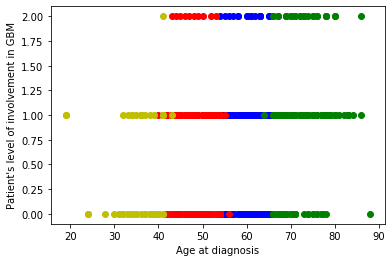

In [1190]:
#plotSegments("Age at diagnosis", "Patient's level of involvement in GBM")
plotSegments("Age at diagnosis", "Patient's level of involvement in GBM")

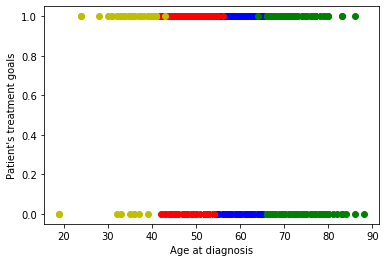

In [1191]:
plotSegments("Age at diagnosis", "Patient's treatment goals")

In [1192]:
from kmodes.kmodes import KModes

For exploring purpose, I also tried K-modes clustering. 
It turned out K-modes does not work on our dataset as the Silouhette graph showed 3 clusters with negative values and the mean Silhoutte score is very low compared to K-means.

In [1193]:
# try K-modes on data
km_cao = KModes(n_clusters=3, init = "Huang", n_init = 5, verbose=1)
fitClusters_huang = km_cao.fit_predict(patient_df_updated)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 146, cost: 4779.0
Run 1, iteration: 2/100, moves: 2, cost: 4779.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 222, cost: 4728.0
Run 2, iteration: 2/100, moves: 90, cost: 4728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 232, cost: 4661.0
Run 3, iteration: 2/100, moves: 0, cost: 4661.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 161, cost: 4783.0
Run 4, iteration: 2/100, moves: 42, cost: 4783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 178, cost: 4703.0
Run 5, iteration: 2/100, moves: 41, cost: 4703.0
Best run was number 3


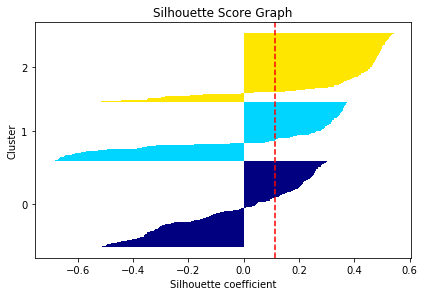

In [1195]:
# negative Silhouette scores, K-modes not selected
plot_silhouettes(patient_df_updated, fitClusters_huang)